## Small network of LIF_rp_v_input neurons (mode generic)
### → Comparison across platforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

v_rs = -70.0 # reset potential (in mV)
v_th = -55.0 # threshold potential (in mV)

#theta_p = 3.0 # early-phase potentiation threshold
#theta_d = 1.2 # early-phase depression threshold

In [2]:
def plot_comparison(data_dir, device_0, device_b2l):
    '''
    Parameters
    ----------
    data_dir : str
        Directory where the data are stored, and where to reulting plots will be saved.
    device_0 : str
        First device to compare (can be "cpp_standalone", "runtime", "lava-preset-CPU-float",
        "lava-preset-CPU-fixed", "lava-preset-Loihi2-fixed", "lava-flexible-CPU-float", etc.)
    device_b2l : str
        Second device to compare. Accepts the same values as `device_0`.
    '''
    # Load membrane voltage values
    v_0 = np.load(f'{data_dir}/v_{device_0}.npy', allow_pickle=True)
    v_b2l = np.load(f'{data_dir}/v_{device_b2l}.npy', allow_pickle=True)
    
    ## Load synaptic weight values
    #w_b = np.load(f'{data_dir}/w_{device_0}.npy', allow_pickle=True)
    #w_b2l = np.load(f'{data_dir}/w_{device_b2l}.npy', allow_pickle=True)
    
    ## Load synaptic calcium values
    #Ca_b = np.load(f'{data_dir}/Ca_{device_0}.npy', allow_pickle=True)
    #Ca_b2l = np.load(f'{data_dir}/Ca_{device_b2l}.npy', allow_pickle=True)
    
    # Load spike times
    spikes_npz_0 = np.load(f'{data_dir}/spikes_{device_0}.npz')
    spikes_0 = [np.array(spikes_npz_0[f'arr_{l}']) for l in range(len(spikes_npz_0)-1)]
    spikes_npz_b2l = np.load(f'{data_dir}/spikes_{device_b2l}.npz')
    spikes_b2l = [np.array(spikes_npz_b2l[f'arr_{l}']) for l in range(len(spikes_npz_b2l)-1)]

    # Plot membrane voltage
    plt.figure(figsize=(12,6))
    plt.plot(v_0[0], v_0[1], linewidth=6, color="#f4d538", label=f"{device_0}")
    plt.plot(v_b2l[0], v_b2l[1], linewidth=1, color="black", label=f"{device_b2l}")
    plt.axhline(y=v_th, color='red', label=r'v_th', linestyle='dashed', linewidth=1.5)
    plt.axhline(y=v_rs, color='orange', label=r'v_rs', linestyle='dashed', linewidth=1.5)
    plt.title('Membrane voltage, neuron 0')
    plt.yticks(np.linspace(v_rs, v_th, 4))
    plt.ylim((1.02*v_rs,0.98*v_th))
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.legend()
    plt.savefig(f'{data_dir}/v_{device_0}_{device_b2l}.png')
    pl = plt.show()
    
    ## Plot the time course of calcium
    #plt.figure(figsize=(12,6))
    #plt.plot(Ca_0[0], Ca_0[1], linewidth=6, color="tab:blue", label=f"{device_0}")
    #plt.plot(Ca_b2l[0], Ca_b2l[1], linewidth=1, color="yellow", label=f"{device_b2l}")
    #plt.axhline(y=theta_p, color='#969664', label=r'$\theta$_p', linestyle='dashed', linewidth=1.5)
    #plt.axhline(y=theta_d, color='#969696', label=r'$\theta$_d', linestyle='dashed', linewidth=1.5)
    #plt.title(f'Calcium amount, synapse 0')
    ##plt.yticks(np.linspace(0, 2*theta_p, 5))
    #plt.ylim((-0.10, 4.10))
    #plt.xlabel('Time (ms)')
    #plt.ylabel('Calcium (arbitary units)')
    #plt.legend()
    #plt.savefig(f'{data_dir}/Ca_{device_0}_{device_b2l}.png')
    #plt.show()
    
    ## Plot the time course of the early-phase weight
    #plt.figure(figsize=(12,6))
    #plt.plot(w_0[0], w_0[1]*100, linewidth=6, color="tab:blue", label=f"{device_0}")
    #plt.plot(w_b2l[0], w_b2l[1]*100, linewidth=1, color="yellow", label=f"{device_b2l}")
    #plt.title(f'Early-phase synaptic weight, synapse 0')
    ##plt.yticks(np.linspace(0, 200, 5))
    #plt.ylim((98.5, 105.5))
    #plt.xlabel('Time (ms)')
    #plt.ylabel('Synaptic weight (%)')
    #plt.legend()
    #plt.savefig(f'{data_dir}/w_{device_0}_{device_b2l}.png')
    #plt.show()
    
    # Plot spikes
    plt.figure(figsize=(12,6))
    plt.eventplot(spikes_0, linewidth=5, color="#f4d538", label=f"{device_0}")
    plt.eventplot(spikes_b2l, linewidth=1, color="black", label=f"{device_b2l}")
    plt.title('Neuronal spikes')
    plt.xticks(np.arange(0,201,25))
    plt.yticks(np.arange(0,10))
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron')
    plt.savefig(f'{data_dir}/spikes_{device_0}_{device_b2l}.png')
    pl = plt.show()

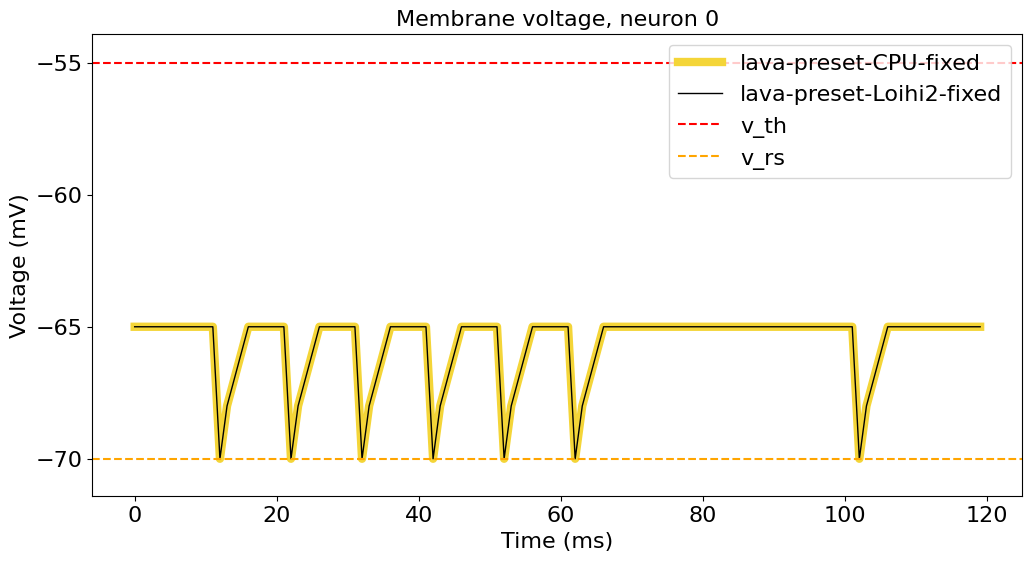

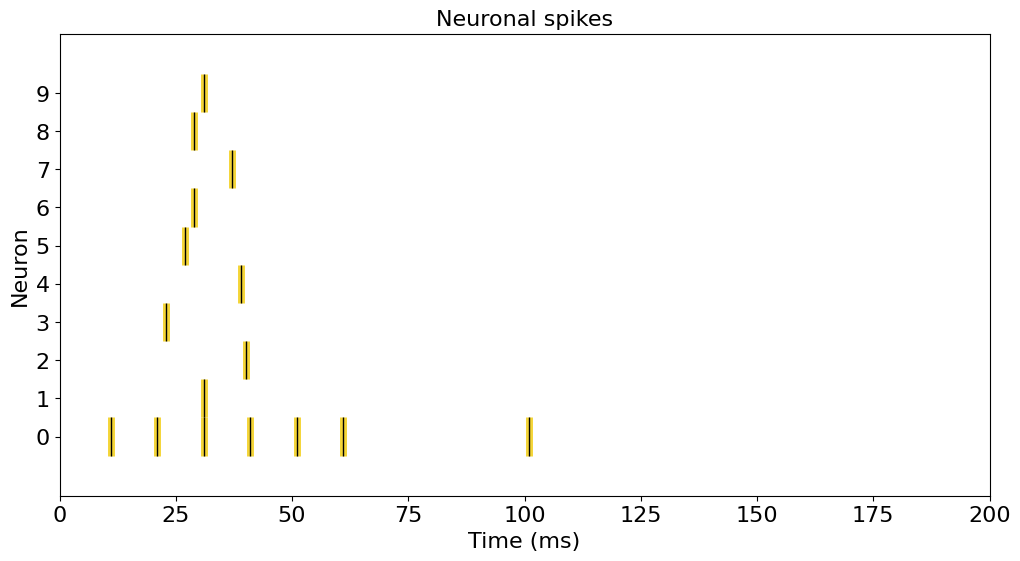

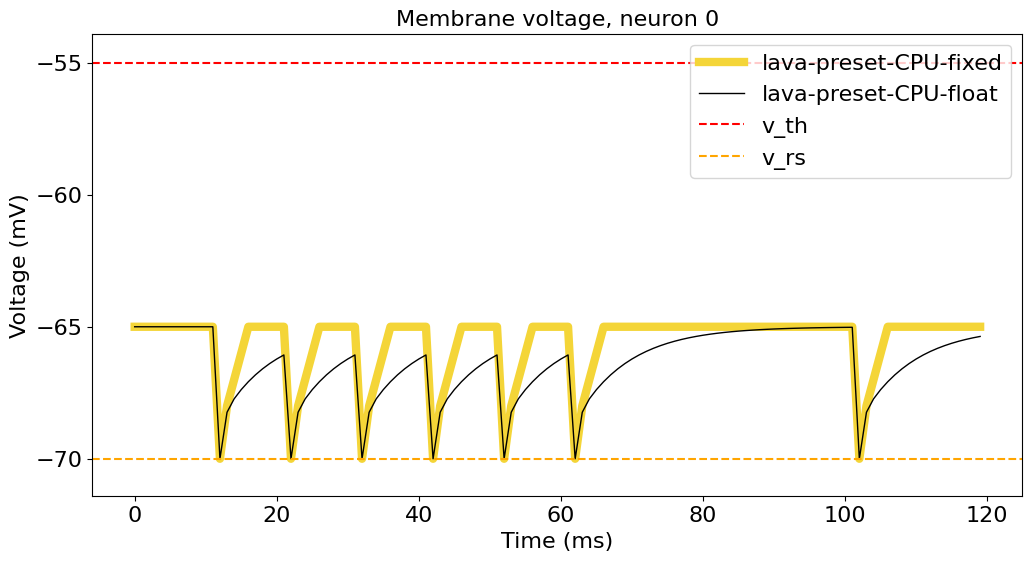

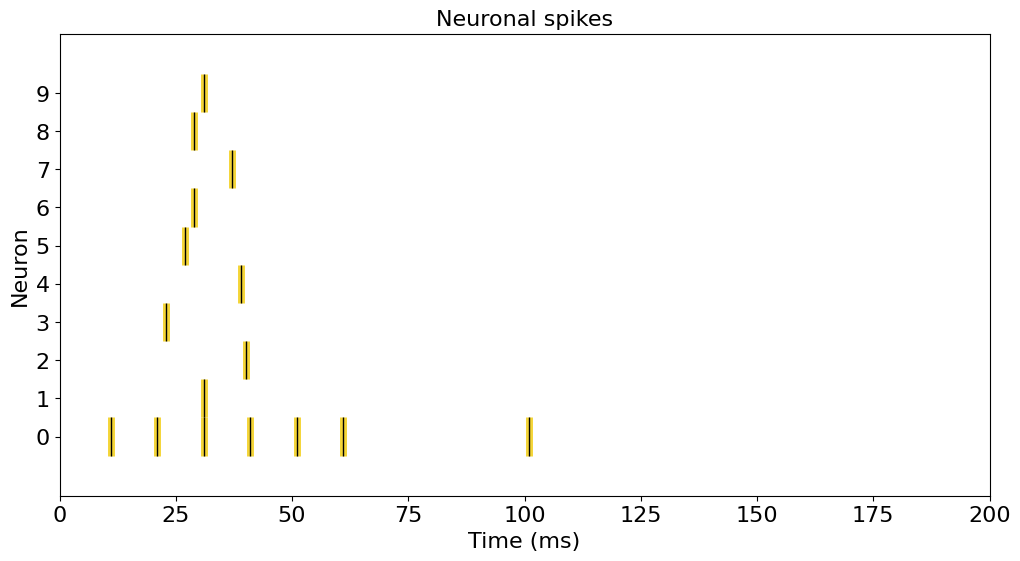

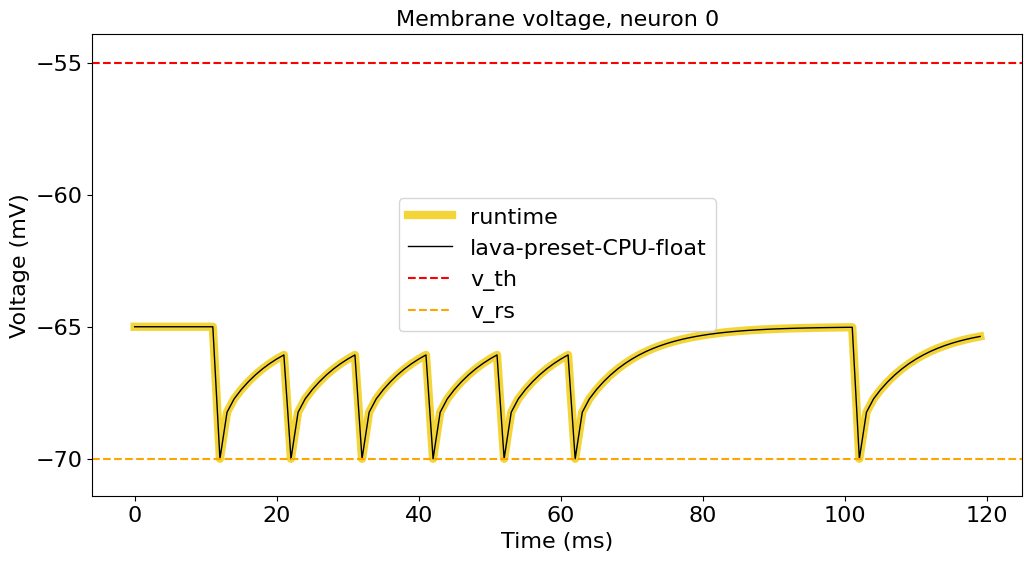

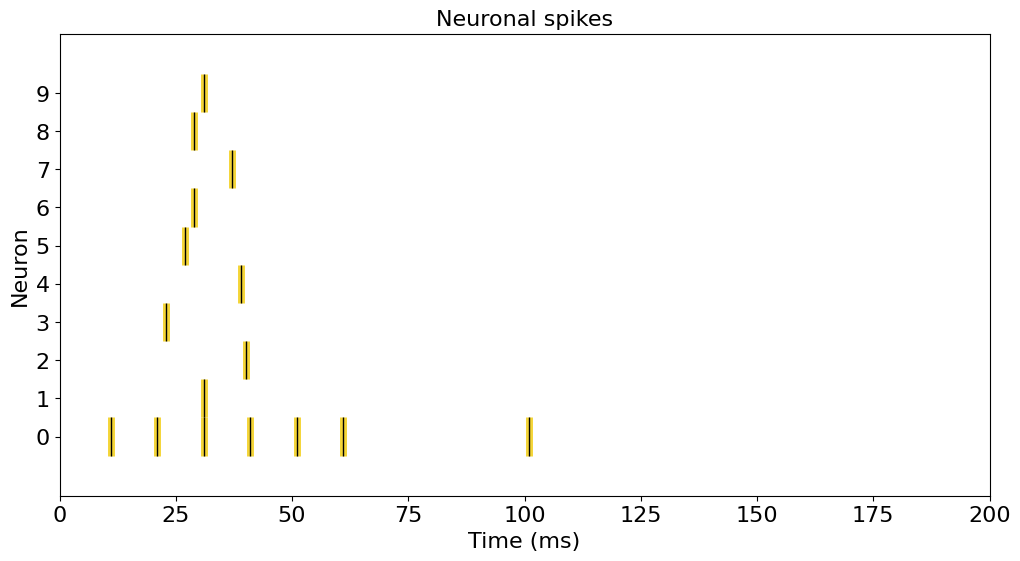

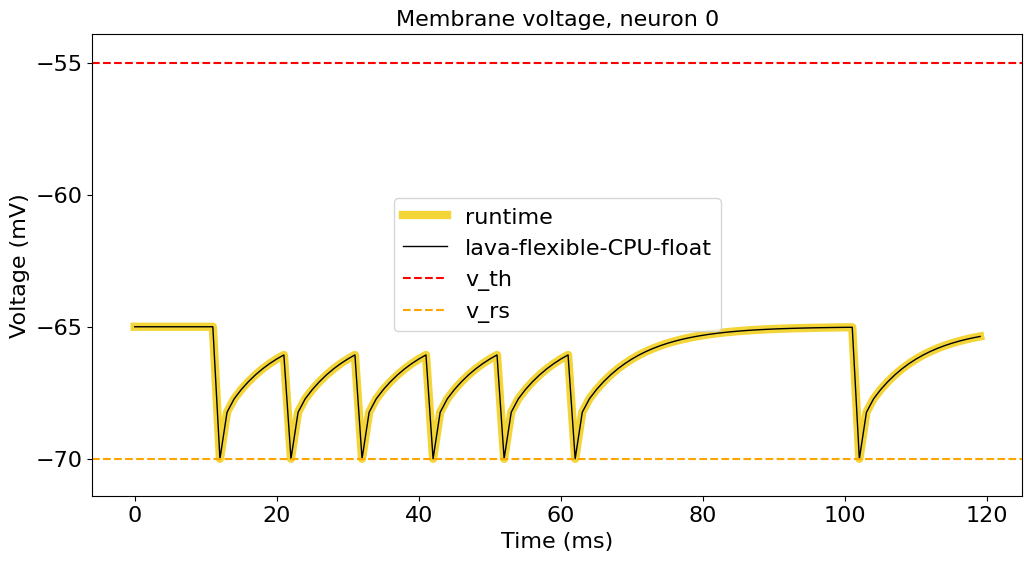

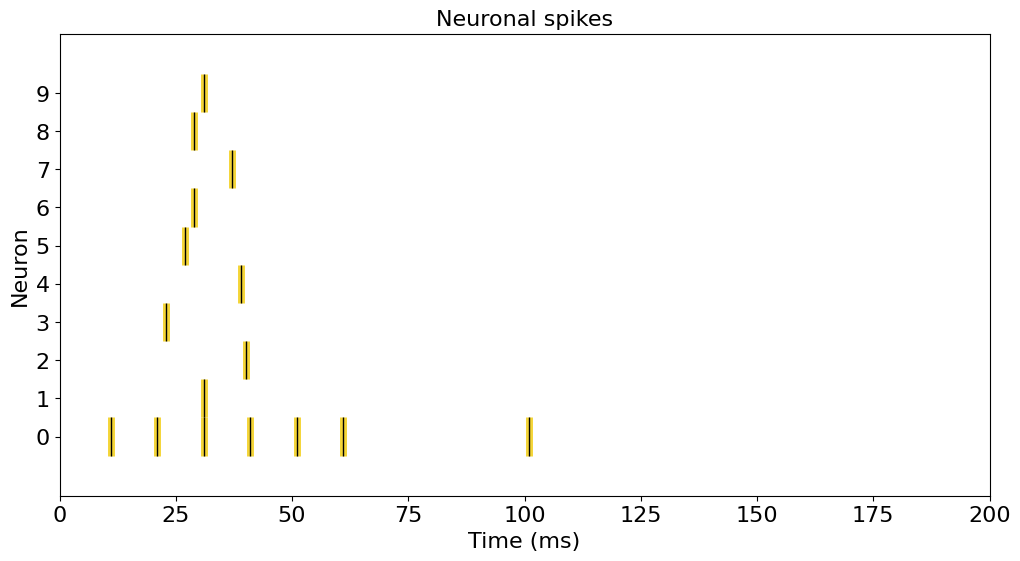

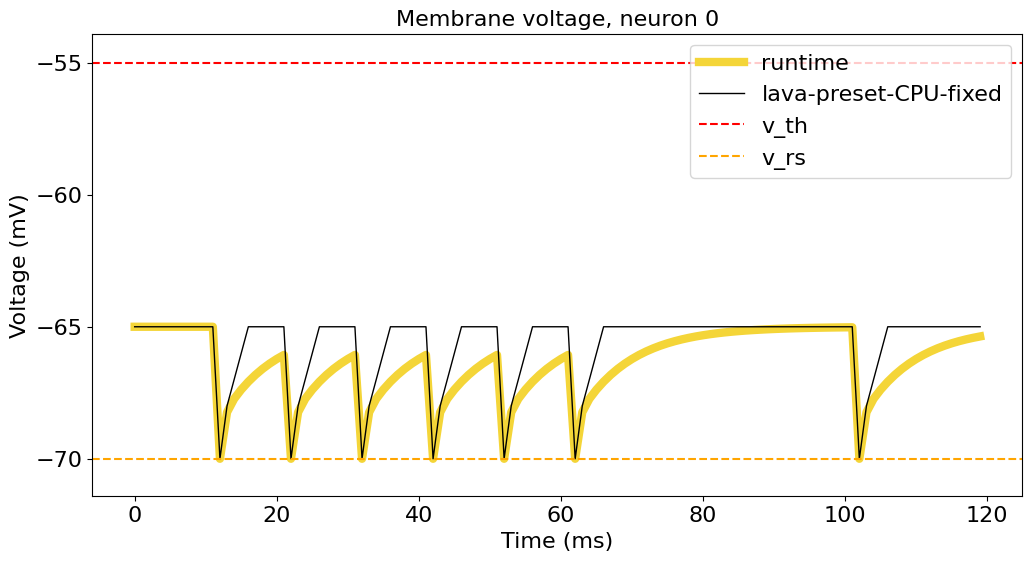

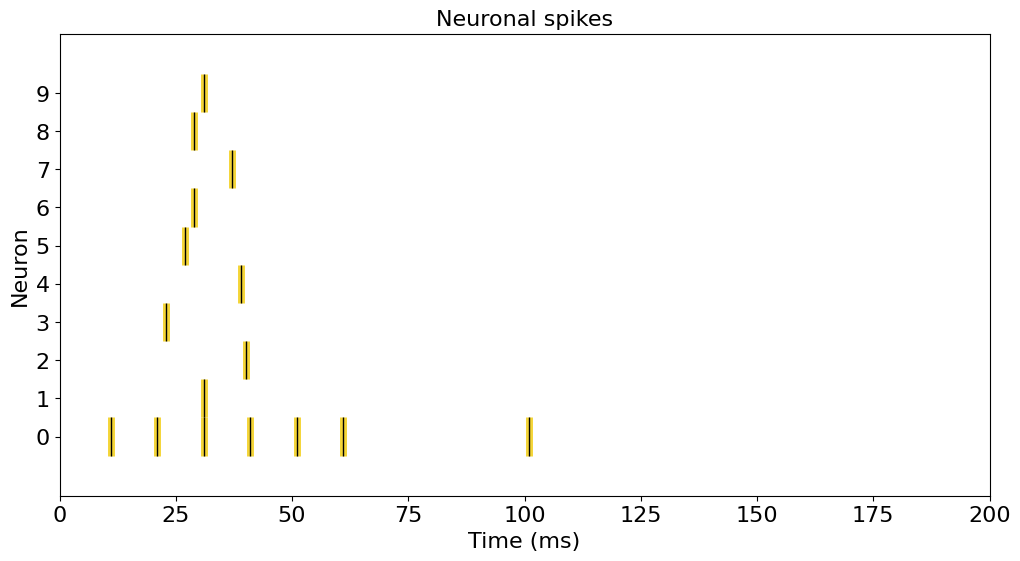

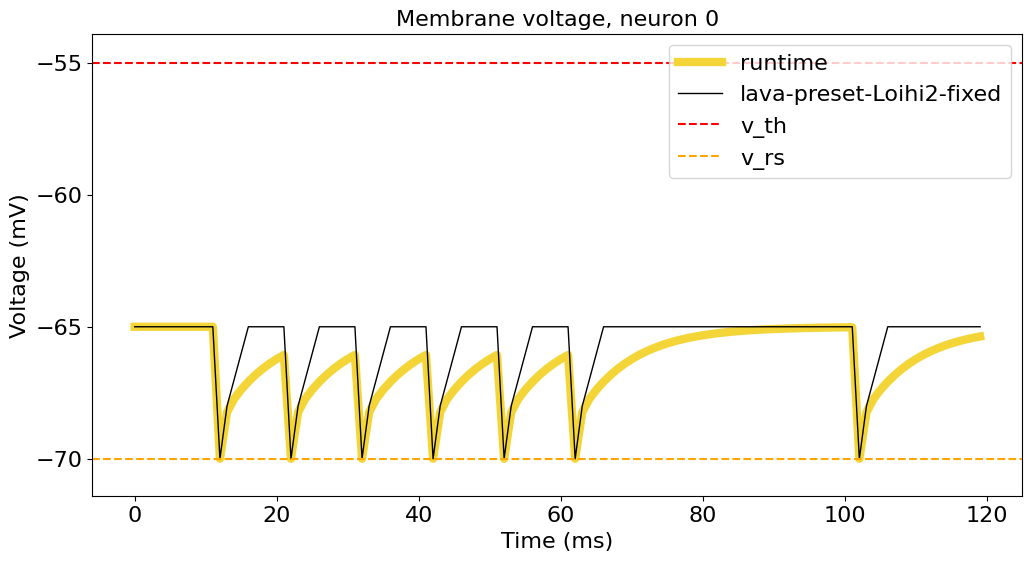

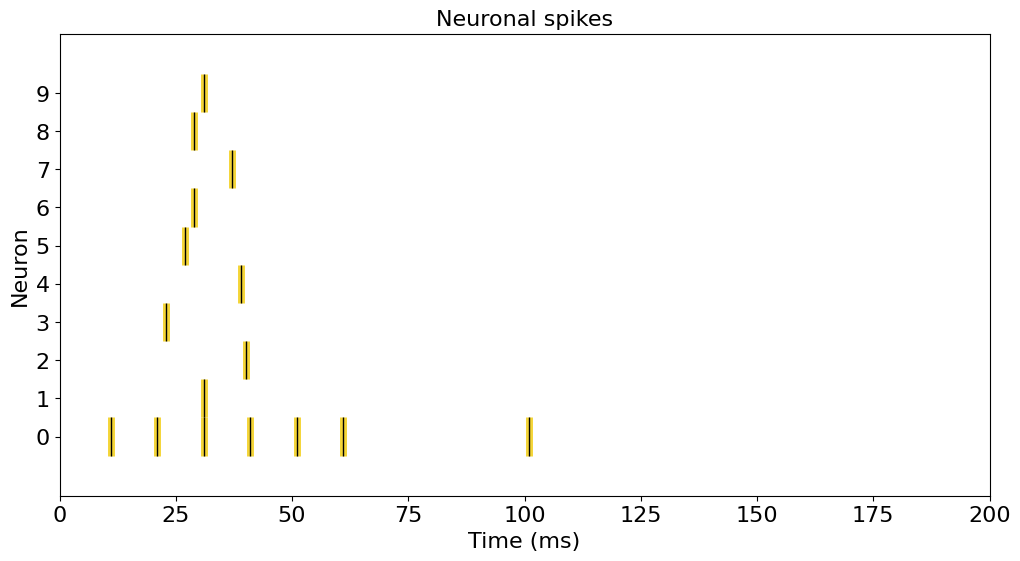

In [3]:
data_dir = "lif_rp_v_input_small_network_generic"

# Comparisons against "lava-preset-CPU-fixed" device
device_0 = "lava-preset-CPU-fixed"
for device_b2l in ["lava-preset-Loihi2-fixed", "lava-preset-CPU-float"]:
    plot_comparison(data_dir, device_0, device_b2l)
    
# Comparisons against "runtime" device
device_0 = "runtime"
for device_b2l in ["lava-preset-CPU-float", "lava-flexible-CPU-float",
                   "lava-preset-CPU-fixed", "lava-preset-Loihi2-fixed"]:
    plot_comparison(data_dir, device_0, device_b2l)